<a href="https://colab.research.google.com/github/bchiramani/TraitementImages/blob/main/TP1TraitementImages.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import array
from random import *
import pandas as pd
import matplotlib.pyplot as plt


# Read a PGM File

In [ ]:
def read_pgm(pgm):
  (width,height)=pgm.split('\n')[2].split()
  image=[]
  for i in range(4,int(height)+4):
    data=pgm.split('\n')[i].split()
    image.append(data)
  return np.array(image)

## Explore some caracteristics


*   the mean
*   the standard deviation
*   Histrogram
*   Cumulated histogram



In [ ]:
def print_histogram(tab):
  index = range(0,256)
  plt.figure(figsize=(9, 3))
  plt.subplot(131)
  plt.bar(x=index,height=tab) ;

In [ ]:
def calculate_mean_std(image):
  sum =0
  height=image.shape[0]
  width=image.shape[1]
  for h in range(height):
    for w in range(width):
      sum+=int(image[h][w])
  mean=sum/(height*width)
  sum=0
  for h in range(height):
    for w in range(width):
      sum += (int(image[h][w]) - mean)**2
  std = (sum/(height*width))**(1/2)
  return mean,std


In [ ]:
def histogram(image):
  height = image.shape[0]
  width = image.shape[1]
  tab = np.zeros((256))
  for h in range(height):
    for w in range(width):
      tab[int(image[h][w])] +=1
  return tab

In [ ]:
def cumulated_histogram(image):
  tab = histogram(image)
  for i in range(1,256):
    tab[i] += tab[i-1]
  return tab

In [ ]:
def program(path):
  with open(path, 'r') as f :
    file = f.read()
  image = read_pgm(file)
  mean , std = calculate_mean_std(image)
  print("The mean value is {} and the standard deviation is {}\n".format(mean,std))
  tab1=histogram(image)
  print_histogram(tab1)
  tab2=cumulated_histogram(image)
  print_histogram(tab2)

The mean value is 85.43944010416666 and the standard deviation is 71.04911303252288



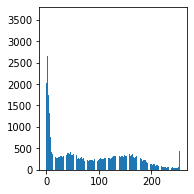

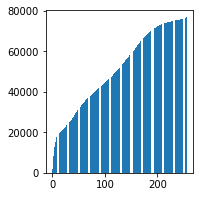

In [ ]:
program("/content/chat.pgm")

# Histogram equalization

In [ ]:
def probability(image):
  height = image.shape[0]
  width = image.shape[1]
  tab=histogram(image)
  tab1 = np.zeros((256))
  for i in range(0,tab.size):
    tab1[i]=tab[i]/(height*width)
  return tab1

In [ ]:
def cumulated_probability(image):
  height = image.shape[0]
  width = image.shape[1]
  tab=cumulated_histogram(image)
  tab1 = np.zeros((256))
  for i in range(0,tab.size):
    tab1[i]=tab[i]/(height*width)
  return tab1

In [ ]:
def function_a(image):
  tab=cumulated_probability(image)
  tab_a = np.zeros((256))
  for i in range(0,tab.size):
    tab_a[i]=tab[i]*(255)
  return tab_a

In [ ]:
def write_pgm(width,height,filename,matrice):
  data=""
  for i in range(0,height):
    for j in range(0,width):
      data+=str(matrice[i][j])+" "
    data +="\n"
  fout=open(filename, "w")
  pgm_header='P2'+'\n'+str(width)+' '+str(height)+' '+str(255)+'\n'
  fout.write(pgm_header)
  fout.write(data)
  fout.close()


In [ ]:
def equalization_program(path):
  tab = np.zeros((256))
  tab1 = np.zeros((256))
  tab2 = np.zeros((256))
  tab2 = np.zeros((256))
  tab_a= np.zeros((256))
  n1= np.zeros((256))
  h_equalized= np.zeros((256))
  

  with open(path, 'r') as f :
    file = f.read()
  image = read_pgm(file)

  tab=histogram(image)
  
  tab_a=function_a(image)
  for i in range(0 , tab_a.size):
    n1[i]=int(tab_a[i])
  sum=tab[0]
  for i in range(1, 255):
    if (n1[i]==n1[i-1]):
      sum+=tab[i]
    else:
      h_equalized[int(n1[i-1])]=sum
      sum=tab[i]
  print_histogram(tab)
  print_histogram(h_equalized)


  height = image.shape[0]
  width = image.shape[1]
  i=0
  image1=[]
  for h in range(0,height):
    im=[]
    for w in range(0,width):
      im.append(int(n1[int(image[h][w])]))
    image1.append(im)
    
  return(image1)
  #print(image1)

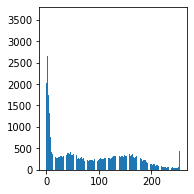

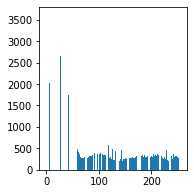

In [ ]:
matrice=equalization_program("/content/chat.pgm")
write_pgm(320,240,"chatEgalisé.pgm",matrice)

## Linear Transformation

In [ ]:
def calcul_coef(x1,y1,x2,y2):
  a=(y2-y1)/(x2-x1)
  b=y1-a*x1
  return a,b


In [ ]:
def transformation_lineaire(tab,x1,y1,x2,y2):
  tab1 = np.zeros((256))
  a0,b0=calcul_coef(0,0,x1,y1)
  a1,b1=calcul_coef(x1,y1,x2,y2)
  a2,b2=calcul_coef(x2,y2,255,255)
  for i in range(0,x1):
    tab1[i]=int(a0*tab[i]+b0)
  for i in range(x1,x2):
    tab1[i]=int(a1*tab[i]+b1)
  for i in range(x2,255):
    tab1[i]=int(a2*tab[i]+b2)
  return tab1

In [ ]:
def programme_lineaire(path):
  with open(path, 'r') as f :
    fichier = f.read()
  image = read_pgm(fichier)
  print_histogram(histogram(image))
  tab = np.zeros((256))
  for i in range(0,256):
    tab[i]=i

  result = np.zeros((256))
  result=transformation_lineaire(tab,50,100,150,200)

  height = image.shape[0]
  width = image.shape[1]
  i=0
  image1=[]
  for h in range(0,height):
    im=[]
    for w in range(0,width):
      im.append(int(result[int(image[h][w])]))
    image1.append(im)
    
  return(image1)


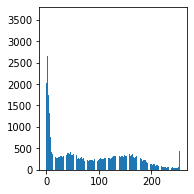

In [ ]:
matrice=programme_lineaire("/content/chat.pgm")
write_pgm(320,240,"chatLinearisé.pgm",matrice)



In [ ]:
with open("/content/chatLinearisé.pgm", 'r') as f :
  file = f.read()
image = read_pgm(file)
tab=histogram(image)
print_histogram(tab)

ValueError: ignored

# Filters

In [ ]:
def generate_nbr(pix):
  nbr=randint(0,20)
  if(nbr==0):
    return 0
  if (nbr==20):
    return 255
  return pix

In [ ]:
def bruit(image):
  height = image.shape[0]
  width = image.shape[1]
  for i in range(0,height):
    for j in range(0,width):
      image[i,j]=generate_nbr(image[i,j])
  return image
  




In [ ]:
def add_padding(filtre,image):
  taille= filtre.shape[0]
  height = image.shape[0]
  width = image.shape[1]
  extended_image = np.zeros((height + filtre.shape[0], width + filtre.shape[1]))
  for i in range(0, image.shape[0]):
    for j in range(0, image.shape[1]):
      extended_image [int(filtre.shape[0]/2)+i][int(filtre.shape[1]/2)+j] = image[i][j]

  return extended_image
      

  


In [ ]:
def convolution(filtre, image, corr):
  sum = 0
  
  for i in range(-int(filtre.shape[0]/2),int(filtre.shape[0]/2)):
    for j in range(-int(filtre.shape[1]/2),int(filtre.shape[1]/2)):
      sum += image[corr[0]+i ][corr[1] + j] * filtre[int(filtre.shape[0]/2)+i][int(filtre.shape[1]/2)+j]
  return int(sum)

In [ ]:
def apply_convolution(image,filtre):
  image=add_padding(filtre,image)
  for i in range(int(filtre.shape[0]/2), image.shape[0]-int(filtre.shape[0]/2)):
    for j in range(int(filtre.shape[1]/2), image.shape[1]-int(filtre.shape[1]/2)):
      image[i][j] = convolution(filtre, image, (i, j))

  return image[int(filtre.shape[0]/2): image.shape[0]+int(filtre.shape[0]/2)][int(filtre.shape[1]/2): image.shape[1]+int(filtre.shape[1]/2)]

  

In [ ]:
def programme_moyenneur(path,filtre):
  with open(path, 'r') as f :
    fichier = f.read()
  image = read_pgm(fichier)
  print("original image : ",image)
  image_bruit=bruit(image)
  print("image bruitée : ",image_bruit)
  write_pgm(320,240,"ImageBruité.pgm",image_bruit)
  image_convolue=apply_convolution(image_bruit,filtre)
  print("image convolue avec ce filtre : ",image_convolue)
  return image_convolue

  

# Filtre moyenneur

In [ ]:
filtre=np.ones((3,3))/9
filtred_image=programme_moyenneur("/content/chat.pgm",filtre)
write_pgm(320,240,"FiltredchatMoyenneur.pgm",filtred_image)

original image :  [['1' '1' '1' ... '2' '4' '3']
 ['1' '1' '1' ... '1' '1' '1']
 ['1' '1' '1' ... '1' '1' '1']
 ...
 ['16' '13' '12' ... '37' '52' '53']
 ['11' '10' '11' ... '33' '36' '47']
 ['11' '9' '10' ... '25' '27' '49']]
image bruitée :  [['1' '1' '1' ... '2' '4' '3']
 ['1' '1' '1' ... '1' '1' '255']
 ['1' '1' '1' ... '1' '1' '1']
 ...
 ['16' '13' '12' ... '0' '52' '53']
 ['11' '10' '11' ... '0' '36' '47']
 ['11' '9' '10' ... '25' '27' '49']]
image convolue avec ce filtre :  [[ 0.  0.  0. ... 28.  3.  0.]
 [ 0.  0.  0. ...  3.  3.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 ...
 [ 0.  1.  1. ...  7.  1.  0.]
 [ 0.  0.  0. ...  1.  1.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]]


# Filtre Gaussien

In [ ]:
filtre=np.array([[1,2,1],[2,4,2],[1,2,1]])/16
image_filtred=programme_moyenneur("/content/chat.pgm",filtre)
write_pgm(320,240,"FiltredchatGaussien.pgm",filtred_image)

original image :  [['1' '1' '1' ... '2' '4' '3']
 ['1' '1' '1' ... '1' '1' '1']
 ['1' '1' '1' ... '1' '1' '1']
 ...
 ['16' '13' '12' ... '37' '52' '53']
 ['11' '10' '11' ... '33' '36' '47']
 ['11' '9' '10' ... '25' '27' '49']]
image bruitée :  [['1' '1' '1' ... '2' '4' '3']
 ['1' '1' '1' ... '1' '1' '1']
 ['1' '1' '1' ... '1' '1' '1']
 ...
 ['16' '13' '0' ... '37' '52' '53']
 ['11' '10' '11' ... '33' '36' '47']
 ['11' '9' '10' ... '25' '27' '49']]
image convolue avec ce filtre :  [[ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0. 63.  8. ...  0.  0.  0.]
 ...
 [ 0.  3.  3. ... 16.  3.  0.]
 [ 0.  0.  0. ...  2.  1.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]]
